In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df=pd.read_csv("/content/car data.csv")

In [ ]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [ ]:
df.shape

(301, 9)

In [ ]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
df.drop(['Car_Name'],axis=1,inplace = True)

In [ ]:
y = df['Selling_Price']
X = df.drop(['Selling_Price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = 1)

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(91,)


In [ ]:
pair_df = [df[["Year", "Present_Price", "Kms_Driven", "Owner"]],
           pd.get_dummies(df[["Fuel_Type", "Seller_Type", "Transmission"]],
                          drop_first=True), df[["Selling_Price"]]]
X = pd.concat(pair_df, axis=1)
y = df[["Selling_Price"]]

X.head()

Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014           5.59       27000      0                 0                 1   
1  2013           9.54       43000      0                 1                 0   
2  2017           9.85        6900      0                 0                 1   
3  2011           4.15        5200      0                 0                 1   
4  2014           6.87       42450      0                 1                 0   

   Seller_Type_Individual  Transmission_Manual  Selling_Price  
0                       0                    1           3.35  
1                       0                    1           4.75  
2                       0                    1           7.25  
3                       0                    1           2.85  
4                       0                    1           4.60

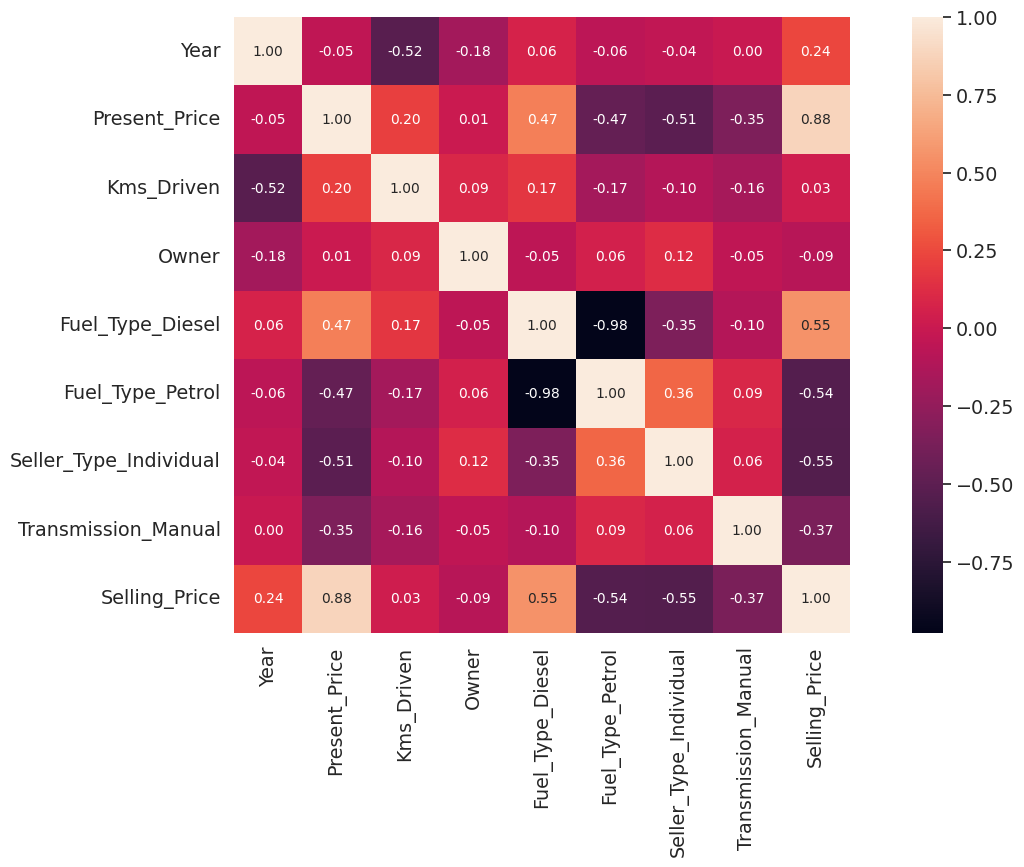

In [ ]:
plt.figure(figsize=(16,8))
corrmat = X.corr()
cols = corrmat.index
cm = np.corrcoef(X[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
X.drop(labels=["Selling_Price"], axis=1, inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("MSE: ", mean_absolute_error(y_true=y_train, y_pred=linreg.predict(X_train)))

print("MAE: ", mean_squared_error(y_true=y_train, y_pred=linreg.predict(X_train)))

MSE:  1.1469806810379803
MAE:  2.8763210780593043


In [ ]:
X.head(1)

Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  Fuel_Type_Petrol  \
0  2014           5.59       27000      0                 0                 1   

   Seller_Type_Individual  Transmission_Manual  
0                       0                    1

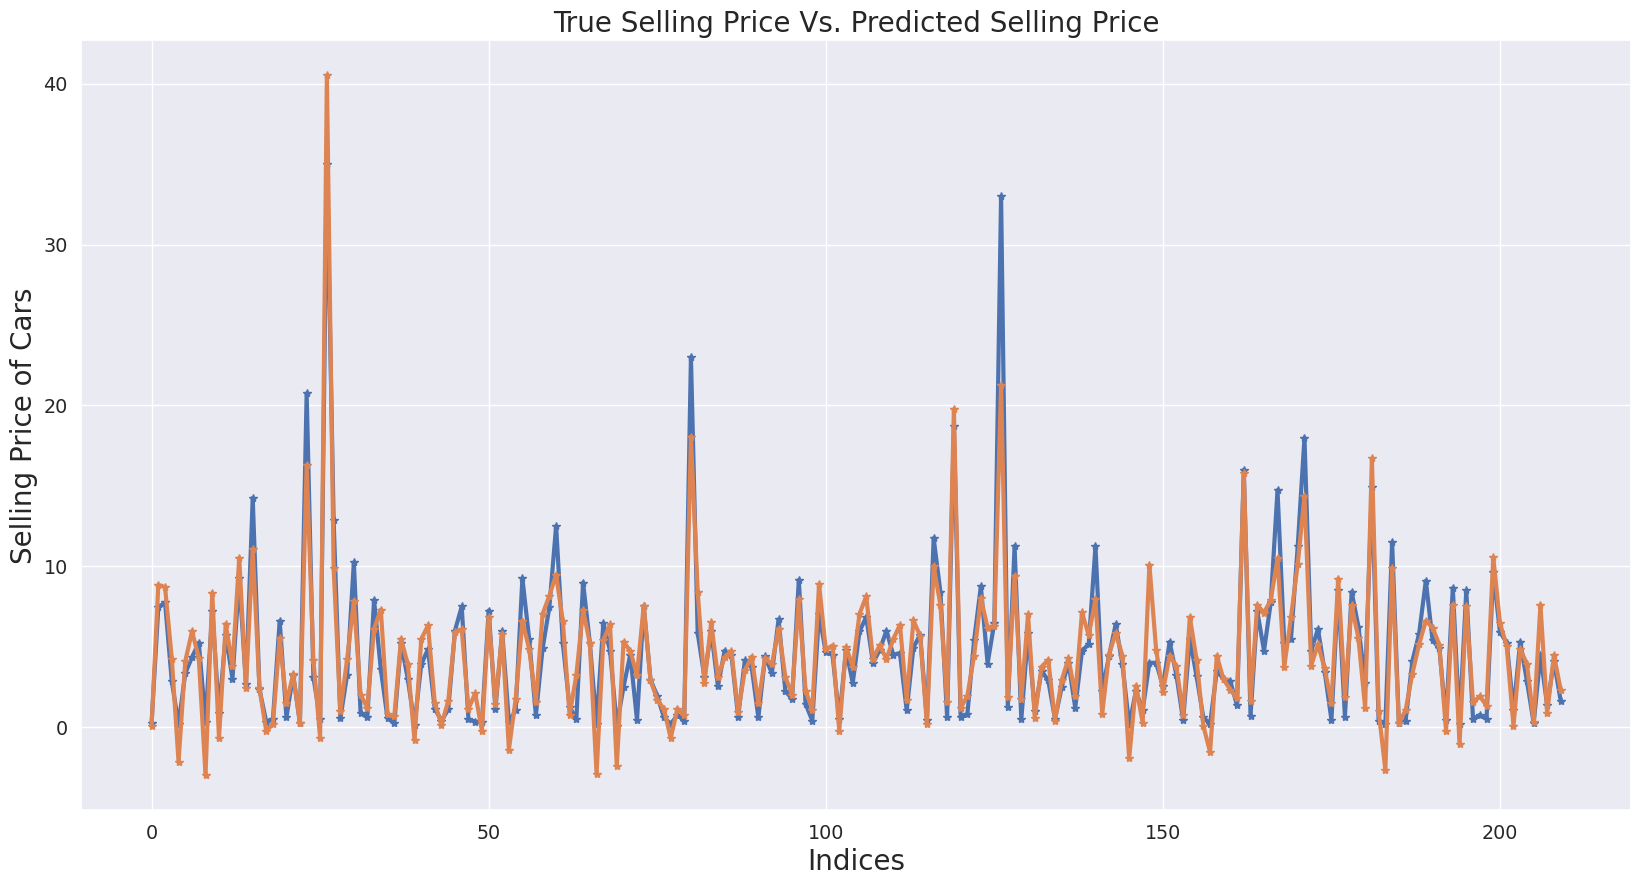

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(range(0, len(y_train)), y_train, label="TrueValues", marker="*", linewidth=3)
plt.plot(range(0, len(y_train)), linreg.predict(X_train), label="PredictedValues", marker="*", linewidth=3)
plt.xlabel("Indices",fontsize=20)
plt.ylabel("Selling Price of Cars",fontsize=20)
plt.title("True Selling Price Vs. Predicted Selling Price",fontsize=20)
plt.show()